<a href="https://colab.research.google.com/github/TopStrikr/Data-Analysis-in-Sports-using-Python/blob/main/Shot_Timing_Analysis_Case_Study_4_with_reviewercahnge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class Distribution Before Balancing:
 Timing Index
3    7
1    7
4    5
0    4
2    1
Name: count, dtype: int64

Training Random Forest...
Random Forest Cross-Validation Accuracy: 0.8133
Random Forest Test Accuracy: 0.8571
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1

    accuracy                           0.86         7
   macro avg       0.90      0.90      0.87         7
weighted avg       0.93      0.86      0.86         7



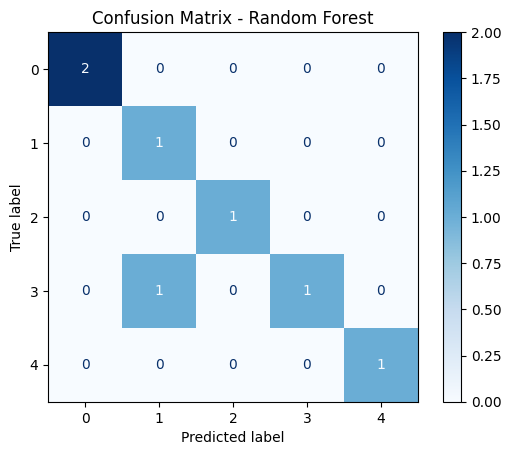


Training Logistic Regression...
Logistic Regression Cross-Validation Accuracy: 0.7067
Logistic Regression Test Accuracy: 0.8571
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1

    accuracy                           0.86         7
   macro avg       0.90      0.90      0.87         7
weighted avg       0.93      0.86      0.86         7



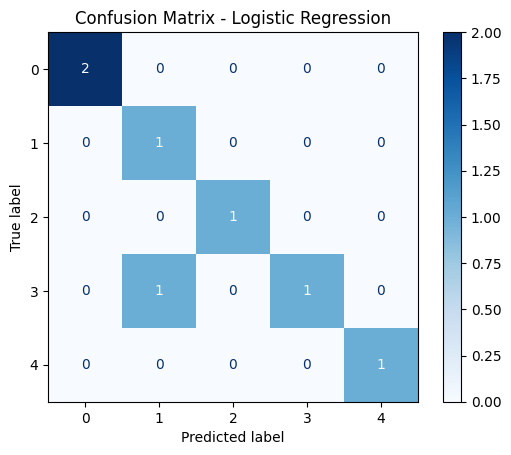


Training Support Vector Machine...
Support Vector Machine Cross-Validation Accuracy: 0.7800
Support Vector Machine Test Accuracy: 0.8571
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1

    accuracy                           0.86         7
   macro avg       0.90      0.90      0.87         7
weighted avg       0.93      0.86      0.86         7



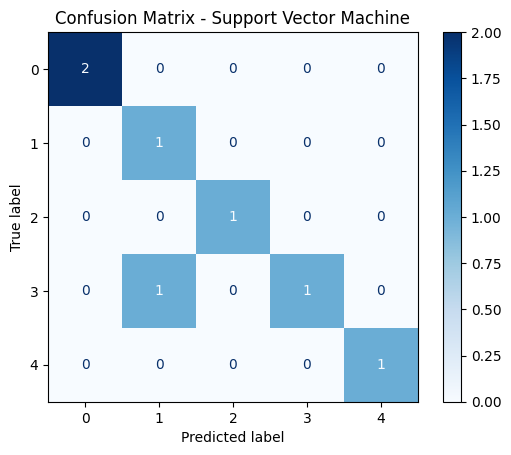


Training K-Nearest Neighbors...
K-Nearest Neighbors Cross-Validation Accuracy: 0.3133
K-Nearest Neighbors Test Accuracy: 0.4286
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.33      1.00      0.50         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.43         7
   macro avg       0.37      0.50      0.37         7
weighted avg       0.40      0.43      0.36         7



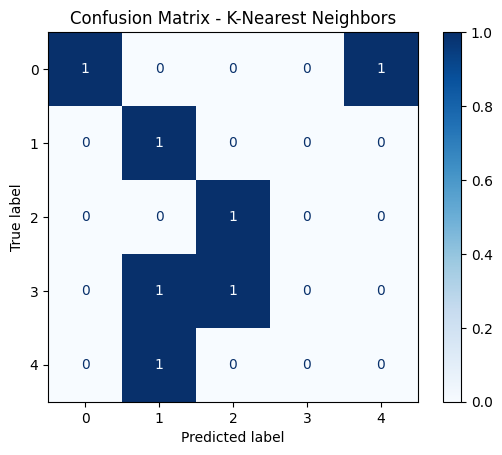


Training Gradient Boosting...
Gradient Boosting Cross-Validation Accuracy: 0.7800
Gradient Boosting Test Accuracy: 0.8571
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1

    accuracy                           0.86         7
   macro avg       0.90      0.90      0.87         7
weighted avg       0.93      0.86      0.86         7



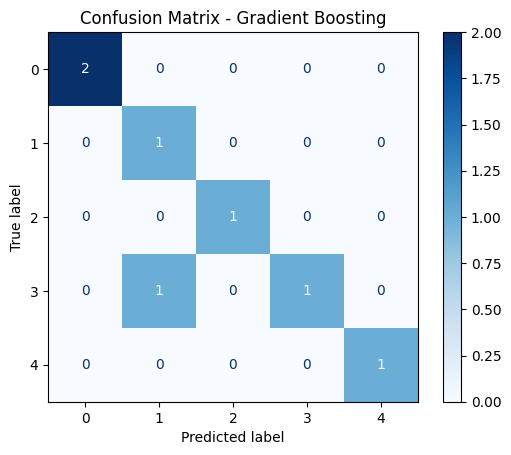

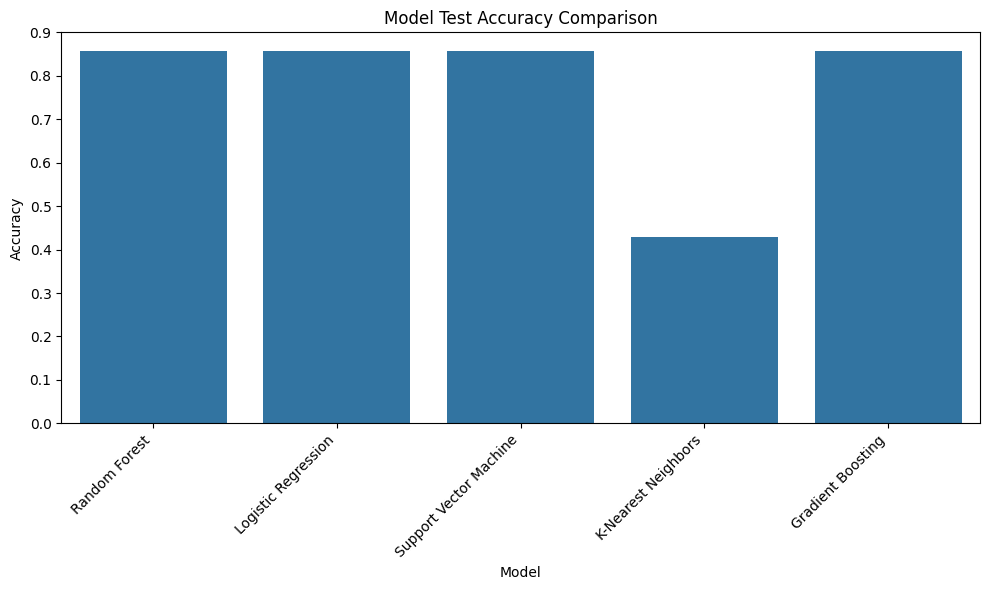

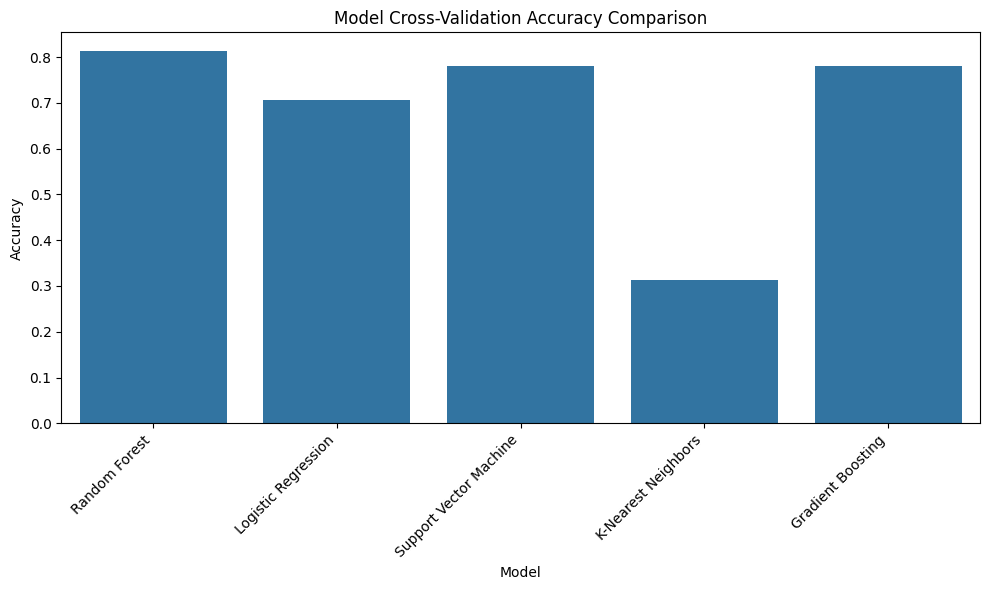

In [ ]:
# Case Study 4: Shot Timing Classification Using Machine Learning

# Research Question:
# Can machine learning models accurately classify shot timing (Early, Timed, Late, etc.)
# using sensor-based motion and angle features from cricket shots?

# Objective:
# To evaluate multiple classifiers on their ability to predict shot timing categories based on
# sensor-recorded biomechanical features. This supports real-time feedback applications for coaching.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/cricket_shots_dataset.csv')

# Drop irrelevant column
df = df.drop(columns=['Sr. No.'])

# Encode categorical features
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Split into features and target
X = df.drop(columns=['Timing Index'])
Y = df['Timing Index']

# Show class distribution
print("Class Distribution Before Balancing:\n", Y.value_counts())

# Balance the dataset by oversampling minority classes
data = pd.concat([X, Y], axis=1)
max_count = data['Timing Index'].value_counts().max()

balanced_data = pd.DataFrame()
for class_label in data['Timing Index'].unique():
    class_data = data[data['Timing Index'] == class_label]
    upsampled = resample(class_data, replace=True, n_samples=max_count, random_state=42)
    balanced_data = pd.concat([balanced_data, upsampled])

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and target
X_bal = balanced_data.drop(columns=['Timing Index'])
Y_bal = balanced_data['Timing Index']

# Feature scaling
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_bal_scaled, Y_bal, test_size=0.2, random_state=42, stratify=Y_bal)

# Hyperparameter Settings:
# - Random Forest: n_estimators = 50, max_depth = 5
# - Logistic Regression: max_iter = 500
# - SVM: kernel = 'rbf', C = 1.0
# - KNN: n_neighbors = 5
# - Gradient Boosting: n_estimators = 50, learning_rate = 0.1, max_depth = 3

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Support Vector Machine': SVC(kernel='rbf', C=1.0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)
}

results = {}

# Training and evaluation
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, zero_division=0)
    results[model_name] = {
        'cross_val_accuracy': scores.mean(),
        'test_accuracy': acc,
        'report': report
    }

    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f}")
    print(f"{model_name} Test Accuracy: {acc:.4f}")
    print(f"{model_name} Classification Report:\n{report}")

    # Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Accuracy comparison plots
model_names = list(results.keys())
test_accuracies = [results[m]['test_accuracy'] for m in model_names]
cross_val_accuracies = [results[m]['cross_val_accuracy'] for m in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=test_accuracies)
plt.title('Model Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=cross_val_accuracies)
plt.title('Model Cross-Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Model Selection Justification:
# The selected models represent a range of learning strategies:
# - Tree-based (Random Forest, Gradient Boosting) for interpretability and handling non-linear splits.
# - Kernel-based (SVM) for non-linear decision boundaries.
# - Distance-based (KNN) for local neighborhood effects.
# - Linear (Logistic Regression) for baseline performance.

# Future Work:
# Given the sequential nature of cricket movement, deep learning models such as LSTMs or 1D CNNs
# can be explored to capture temporal dynamics in bat motion. Additionally, incorporating video-based
# frame analysis may allow hybrid models that fuse sensor and visual data for more robust classification.
